# Agenda

- Handle Imbalanced data in Classification
  - What is imbalanced data
  - Oversampling Technique (SMOTE)
  - Undersampling Technique

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Read the Data

df = pd.read_csv("creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


In [3]:
df.Class.value_counts()

Class
0    1974
1      26
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2000 non-null   float64
 1   V1      2000 non-null   float64
 2   V2      2000 non-null   float64
 3   V3      2000 non-null   float64
 4   V4      2000 non-null   float64
 5   V5      2000 non-null   float64
 6   V6      2000 non-null   float64
 7   V7      2000 non-null   float64
 8   V8      2000 non-null   float64
 9   V9      2000 non-null   float64
 10  V10     2000 non-null   float64
 11  V11     2000 non-null   float64
 12  V12     2000 non-null   float64
 13  V13     2000 non-null   float64
 14  V14     2000 non-null   float64
 15  V15     2000 non-null   float64
 16  V16     2000 non-null   float64
 17  V17     2000 non-null   float64
 18  V18     2000 non-null   float64
 19  V19     2000 non-null   float64
 20  V20     2000 non-null   float64
 21  V21     2000 non-null   float64
 22  

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 14)

In [6]:
y_train.value_counts()

Class
0    1185
1      15
Name: count, dtype: int64

In [7]:
y_test.value_counts()

Class
0    789
1     11
Name: count, dtype: int64

In [8]:
# __DEcision Tree__

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

print(f'Accuracy Score : {accuracy_score(y_test, y_test_pred)}\n')
print(f'Confusion Matrix : \n{confusion_matrix (y_test, y_test_pred)}\n')
print(f'Classification Report : \n{classification_report(y_test, y_test_pred)}')

Accuracy Score : 0.99625

Confusion Matrix : 
[[787   2]
 [  1  10]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       0.83      0.91      0.87        11

    accuracy                           1.00       800
   macro avg       0.92      0.95      0.93       800
weighted avg       1.00      1.00      1.00       800



In [9]:
# __Logistic Regression__

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
y_test_predict = lg.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test, y_test_predict)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_test_predict)}\n')
print(f'Classification Report: \n{classification_report(y_test, y_test_predict)}')

Accuracy Score: 0.9975

Confusion Matrix: 
[[788   1]
 [  1  10]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       0.91      0.91      0.91        11

    accuracy                           1.00       800
   macro avg       0.95      0.95      0.95       800
weighted avg       1.00      1.00      1.00       800



C:\Users\0litt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### OverSampling Technique

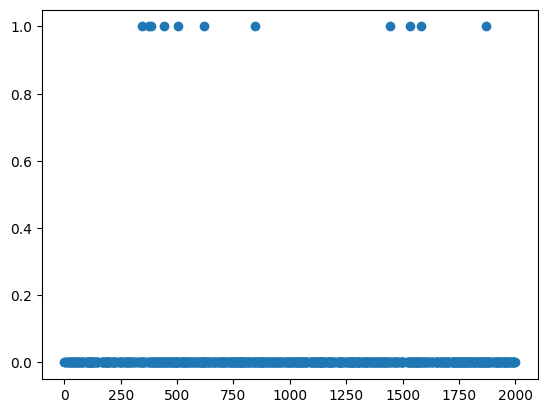

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test.index, y_test.values)
plt.show()

- It is used to balance the class distribution by increasing the number of minority samples. This can be done by duplicating the existing samples or by creating synthetic samples.
- To generate we use SMOTE(Synthetic Minority Oversampling Technique)

In [11]:
#!pip install imbalanced-learn

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

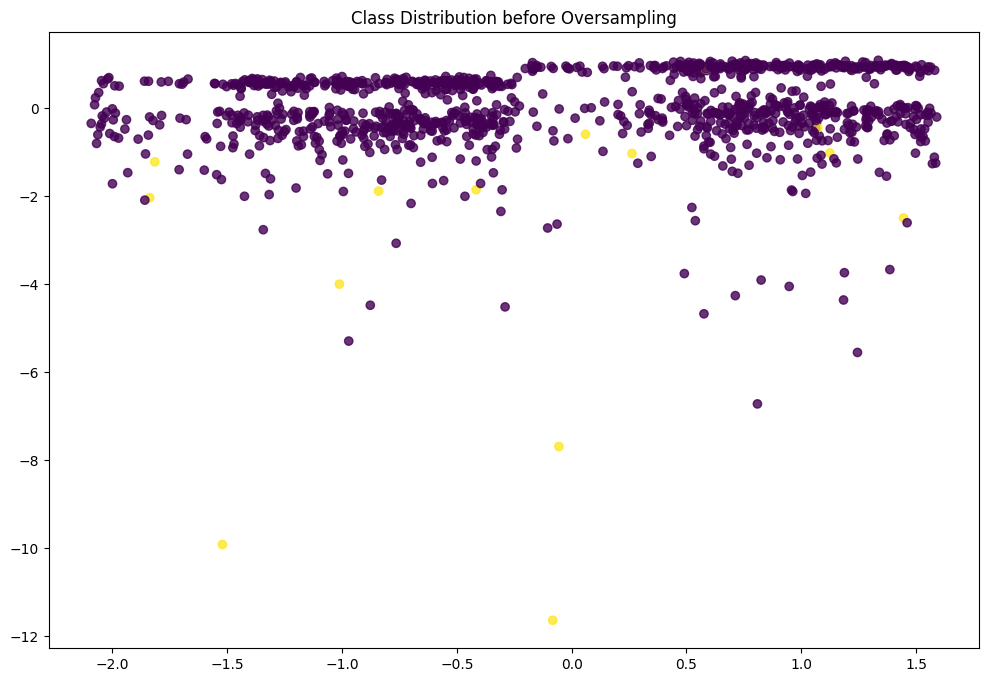

In [13]:
plt.figure(figsize = (12,8))
plt.scatter(X_train_sc[:,0], X_train_sc[:, 1], c = y_train, alpha = 0.8, cmap = 'viridis')
plt.title('Class Distribution before Oversampling')
plt.show()

In [14]:
# Applying SMOTE for Oversampling

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 25)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

In [15]:
print(y_train.value_counts())

print(f' \nOversampling: \n{y_train_smote.value_counts()}')

Class
0    1185
1      15
Name: count, dtype: int64
 
Oversampling: 
Class
0    1185
1    1185
Name: count, dtype: int64


In [16]:
X_train_sc.shape

(1200, 30)

In [17]:
X_train_smote.shape

(2370, 30)

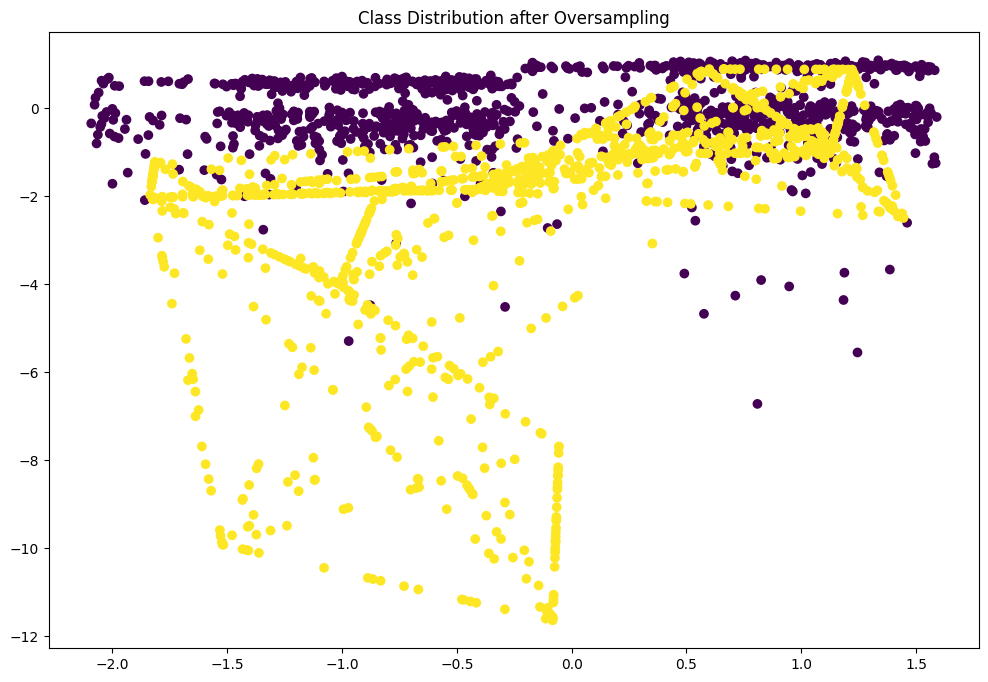

In [18]:
plt.figure(figsize = (12,8))
plt.scatter(X_train_smote[:,0], X_train_smote[:, 1], c = y_train_smote, cmap = 'viridis')
plt.title('Class Distribution after Oversampling')
plt.show()

In [19]:
dt =  DecisionTreeClassifier(max_depth = 7)
dt.fit(X_train_smote, y_train_smote)
y_test_pred = dt.predict(X_test_sc)

print(f'Accuracy Score : {accuracy_score(y_test, y_test_pred)}\n')
print(f'Confusion Martix :\n {confusion_matrix (y_test, y_test_pred)}\n')
print(f'Classification Report: \n {classification_report(y_test, y_test_pred)}')
print(f'Classification Report(Training): \n {classification_report(y_train_smote, dt.predict(X_train_smote))}')

Accuracy Score : 0.98

Confusion Martix :
 [[774  15]
 [  1  10]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       789
           1       0.40      0.91      0.56        11

    accuracy                           0.98       800
   macro avg       0.70      0.95      0.77       800
weighted avg       0.99      0.98      0.98       800

Classification Report(Training): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00      1185

    accuracy                           1.00      2370
   macro avg       1.00      1.00      1.00      2370
weighted avg       1.00      1.00      1.00      2370



### UnderSampling

In [20]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state = 14)
X_train_us, y_train_us = undersampler.fit_resample(X_train_sc, y_train)

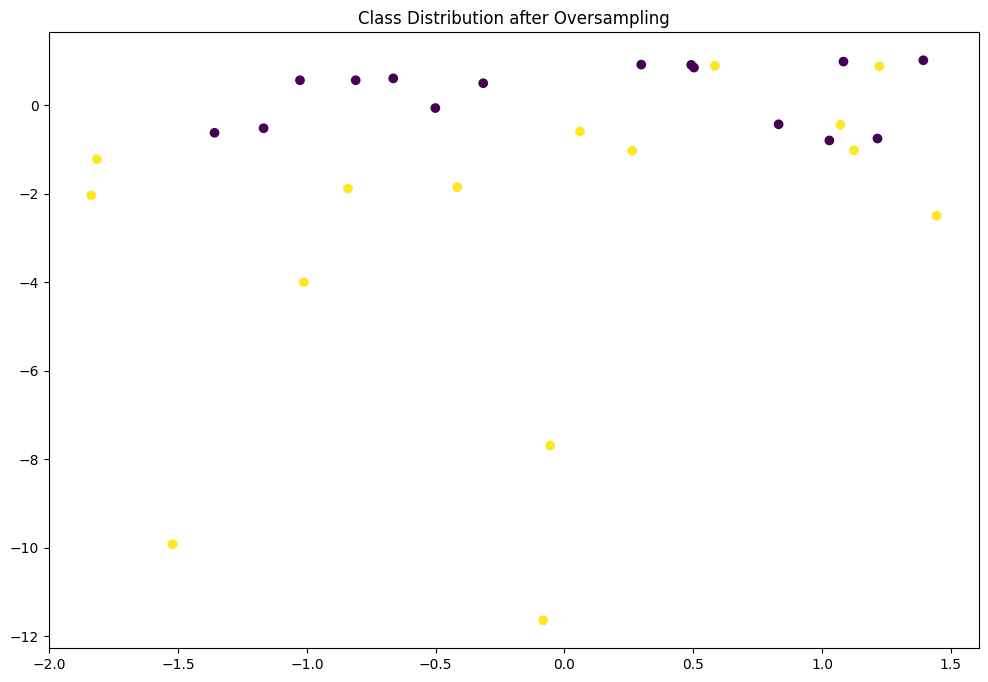

In [21]:
plt.figure(figsize = (12,8))
plt.scatter(X_train_us[:,0], X_train_us[:, 1], c = y_train_us, cmap = 'viridis')
plt.title('Class Distribution after Oversampling')
plt.show()

In [22]:
dt =  DecisionTreeClassifier(max_depth = 7)
dt.fit(X_train_us, y_train_us)
y_test_pred = dt.predict(X_test_sc)

print(f'Accuracy Score : {accuracy_score(y_test, y_test_pred)}\n')
print(f'Confusion Martix :\n {confusion_matrix (y_test, y_test_pred)}\n')
print(f'Classification Report: \n {classification_report(y_test, y_test_pred)}')
print(f'Classification Report(Training): \n {classification_report(y_train_us, dt.predict(X_train_us))}')

Accuracy Score : 0.86125

Confusion Martix :
 [[679 110]
 [  1  10]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       789
           1       0.08      0.91      0.15        11

    accuracy                           0.86       800
   macro avg       0.54      0.88      0.54       800
weighted avg       0.99      0.86      0.91       800

Classification Report(Training): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
X_train_us.shape

(30, 30)

In [24]:
y_train_us.value_counts()

Class
0    15
1    15
Name: count, dtype: int64

In [25]:
# Apply Ensemble Method

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(sampling_strategy = 'all', replacement = True, bootstrap = False)

brf.fit(X_train_sc, y_train)
y_test_pred = brf.predict(X_test_sc)

print(f'Accuracy Score : {accuracy_score(y_test, y_test_pred)}\n')
print(f'Confusion Martix :\n {confusion_matrix (y_test, y_test_pred)}\n')
print(f'Classification Report: \n {classification_report(y_test, y_test_pred)}')
print(f'Classification Report(Training): \n {classification_report(y_train, brf.predict(X_train_sc))}')

Accuracy Score : 0.9925

Confusion Martix :
 [[784   5]
 [  1  10]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       789
           1       0.67      0.91      0.77        11

    accuracy                           0.99       800
   macro avg       0.83      0.95      0.88       800
weighted avg       0.99      0.99      0.99       800

Classification Report(Training): 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1185
           1       0.60      1.00      0.75        15

    accuracy                           0.99      1200
   macro avg       0.80      1.00      0.87      1200
weighted avg       0.99      0.99      0.99      1200

